# EDA ON BREAST CANCER SURVIVAL DATASET (Haberman’s Survival Dataset)
<img src="https://github.com/NiveditaAb/EDA_Pratice_BreastCancer/blob/master/breast-cancer-graphic.jpg?raw=true" width=350 height=450 >

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Importing Dataset](#section301)<br>
4. [Data Profiling](#section4)<br>
  - 4.1 [Understanding Dataset](#section401)<br>
  - 4.2 [Pandas Pre Profiling](#section402)<br>
  - 4.3 [Pandas Post Profiling](#section403)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [Conclusions](#section6)

<a id=section1></a>
## 1. Problem Statement


<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

B:\softwares\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


<a id=section3></a>
## 3. Loading Data

<a id=section301></a>
### 3.1 Importing Dataset

In [2]:
# Importing the dataset

data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
data.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


2. Breast Cancer survival
Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Attribute Information:
1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

## Problem Statement

- Find out if the age of patient at the time of operation impacts the survival rate.
- Find out of the number of nodes detected impacts the rate pf survival.
- Find out the survival rate over the years.

<img src="https://github.com/NiveditaAb/EDA_Pratice_BreastCancer/blob/master/tree.jpg?raw=true" width=350 height=350 >

<a id=section4></a>
## 4. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section401></a>
### 4.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
data.shape # this prints the size of the data, this shows that we have 306 rows and 4 columns

(306, 4)

In [4]:
data.columns # this prints the columns in the data

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [5]:
data.describe() # this gives statistical overview of the data

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Since we can see 306 entries for each column, we do not have any missing data. 

In [6]:
data.info() # this gives the details on each column in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 306 non-null    int64
 1   Years_of_operation  306 non-null    int64
 2   Pos_axillary_nodes  306 non-null    int64
 3   Status              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Here, we can confirm that all columns are numerical.

In [7]:
data.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
data.tail()

,Age,Years_of_operation,Pos_axillary_nodes,Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [9]:
data.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

We can see that there are no null values

<a id=section402></a>
### 4.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. 
- Detailed information about each column, __coorelation between different columns__ and a sample of dataset.
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [10]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas_profiling

In [12]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = pandas_profiling.ProfileReport(data)
profile.to_file(output_file="breast_cancer_before_preprocessing.html")

### Observations from Pre Profiling Report

- The observations from pre profiling report are as follows:
- 1. No Missing cells
- 2. One categorical column of numerical data type
- 3. POS_axillary_nodes has zero values, which is a problem because it doesn't go with the scenario that the patient was operated with none auxillary nodes. Hence, we will replace the zeros with mean values.
- 4. Duplicate rows can be overlooked, since its possible that there is a dupliaccy in the data.
- 5. A slight correlation observed in pos auxillary nodes and status, hence its important to replace axillary zeros.
- 6. There are some outliers in axillary nodes, because maximum value of nodes is found to be 52. Which seems a bit far fetched. We will see how that can be handled.  
- 7. Number of operations in the year 1958 are maximum.

In [13]:
# Lets first start with replacing zeros in nodes column
data['Pos_axillary_nodes']=data['Pos_axillary_nodes'].replace(0,data['Pos_axillary_nodes'].mean())

In [14]:
data.head(15)

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1.000000,1
1,30,62,3.000000,1
2,30,65,4.026144,1
3,31,59,2.000000,1
4,31,65,4.000000,1
5,33,58,10.000000,1
6,33,60,4.026144,1
7,34,59,4.026144,2
8,34,66,9.000000,2
9,34,58,30.000000,1


In [21]:
data['age_group']=data.apply(lambda x:'senior citizen' if x['Age'] < 60 else 'adult' , axis=1)

In [22]:
data.tail(18)

,Age,Years_of_operation,Pos_axillary_nodes,Status,age_group
288,70,67,4.026144,1,adult
289,70,68,4.026144,1,adult
290,70,59,8.000000,1,adult
291,70,63,4.026144,1,adult
292,71,68,2.000000,1,adult
293,72,63,4.026144,2,adult
294,72,58,4.026144,1,adult
295,72,64,4.026144,1,adult
296,72,67,3.000000,1,adult
297,73,62,4.026144,1,adult


<a id=section403></a>
### 4.3 Pandas post profiling

In [23]:
profile=pandas_profiling.ProfileReport(data)
profile.to_file(output_file="breast_cancer_postProfiling_report.pdf")

Text(0.5, 1.0, 'Count plot for survived.')

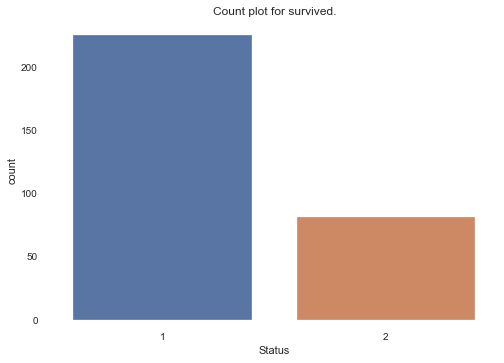

In [97]:
# Find out if the age of patient at the time of operation impacts the survival rate.
sns.countplot(x="Status" , data=data).set_title('Count plot for survived.')

<a id=section5></a>
## 5. Exploratory Data Analysis

As per seen above, the count of Survivors is higher for having survived for more than 5 years, post operation, which is a positive sign.

Text(0.5, 0, 'Status Wise Age distribution')

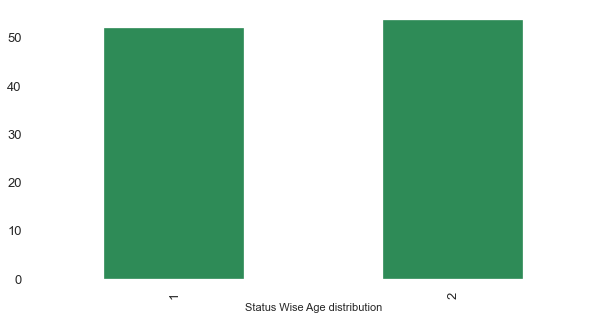

In [150]:
# Age vs status
data.groupby(['Status'])['Age'].mean().plot(kind='bar', figsize=(10,5),fontsize=13, color='seagreen')
plt.xlabel('Status Wise Age distribution')

- As seen here, the survival is not impacted by age, because the mean of age for both categories of survival is the same. 

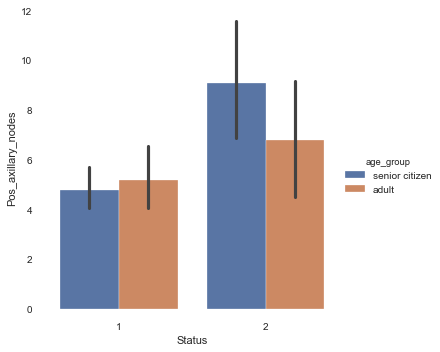

In [99]:
sns.catplot(x="Status", y="Pos_axillary_nodes", hue="age_group", kind="bar", data=data);

- The above graph shows the relationship between status and number of nodes with respect to different age groups.
- The survival of Adults is more compared to Senior Citizens for more than 5 Years span after operation. This comparison is based on very similar number of nodes present.
- More number of senior citizens fall in the category of death within 5 years after operation, but they also posses high number of axillary nodes. 
- Adults with lower number of axillary nodes tend to live more than compared to higher number of axillary nodes.
- Same goes with the Senior Citizens.

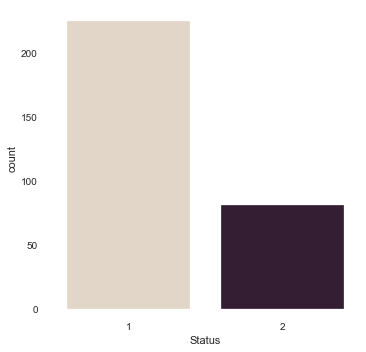

In [100]:
sns.catplot(x="Status",  kind="count", palette="ch:.25", data=data)

- A simple check to see number of patients under both survival categories.

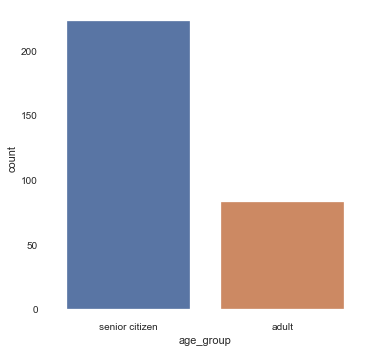

In [101]:
sns.catplot(x="age_group",  kind="count",  data=data)

- A simple check to see number of patients under both Age categories.

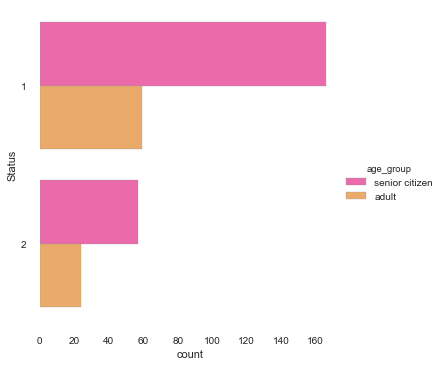

In [102]:
sns.catplot(y="Status", hue="age_group", kind="count",
            palette="spring", edgecolor=".6",
            data=data);

- A graph to identify the Number of patients, Age group wise in survival categories

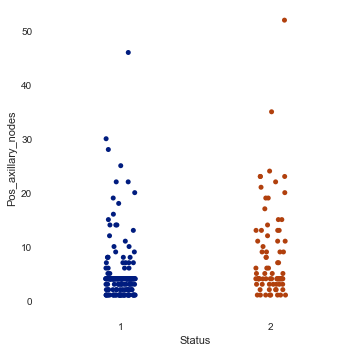

In [152]:
sns.catplot(x="Status", y="Pos_axillary_nodes",data=data, palette="dark")

- A graph to identify categorical relationship with number of axillary nodes vs the survival category

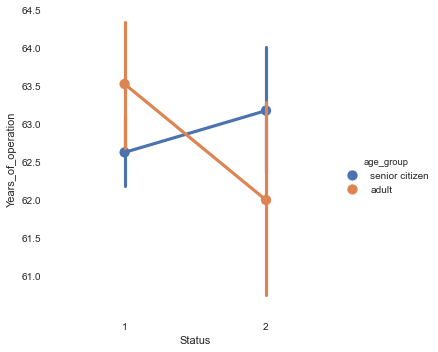

In [104]:
sns.catplot(x="Status", y="Years_of_operation",kind="point", hue="age_group", data=data

- A point graph to check how year of operation is placed with respect to the survival rate.

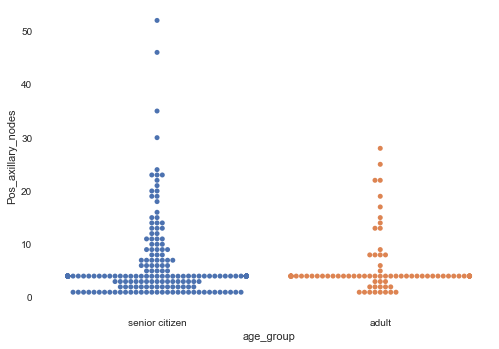

In [105]:
sns.swarmplot(x="age_group", y="Pos_axillary_nodes", data=data)

- A swarmplot to chcek distribution of axillary nodes across age groups that tells us that senior citizens tend to have higher number of axillary nodes in comparison to adults in the range of 0 to 20.

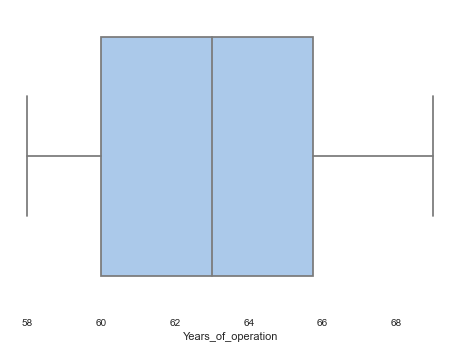

In [106]:
sns.boxplot(x=data["Years_of_operation"],palette="pastel")
#sns.catplot(x="Pos_axillary_nodes", kind="box", data=data)

- A Box plot just to check ditribution of years of operation through the dataset, which seems to be fairly distibuted, eventhough pre profiling report showed maximum operations (36) in the year 1958.

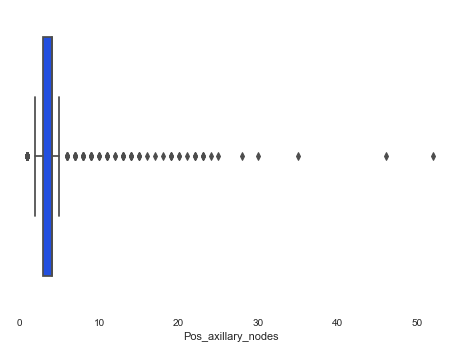

In [167]:
sns.boxplot(x=data["Pos_axillary_nodes"], palette="bright")

- Pos axillary nodes has a few outliers and concentrated around 4, which is the mean value that we replaced the zeros with.

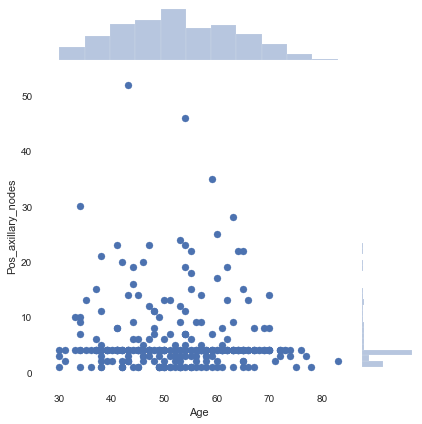

In [107]:
sns.jointplot(x="Age", y="Pos_axillary_nodes", data=data)

- The jointplot between Age and number of nodes shows equals distribution across all ages for the standardised value and we cannot say Age is an impacting factor for number of nodes.
- But it can be observed that nodes are pretty dense around the age range of 50 to 60.

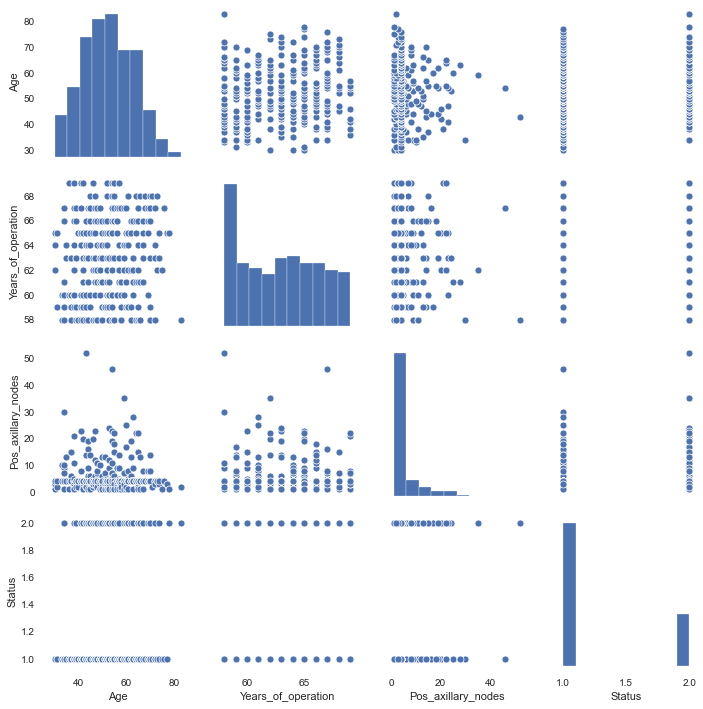

In [108]:
sns.pairplot(data, palette="pastel")

- A pairplot to analyse scatter plots against each variable in the dataset.

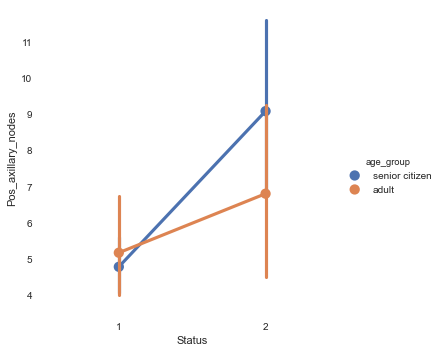

In [109]:
sns.catplot(x="Status", y="Pos_axillary_nodes",kind="point", hue="age_group", data=data)

- A point plot to analyze relationship between survival category and axillary nodes, age group wise.

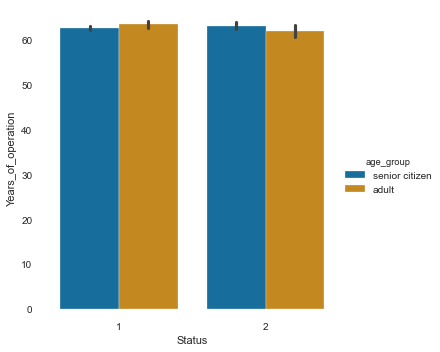

In [151]:
sns.catplot(x="Status", y="Years_of_operation",kind="bar", hue="age_group", data=data, palette="colorblind")

- A bar graph to analyze the distibution of survival categories throughout the years of operation and categorized over age groups.
- This confirms that the year od operation has no impact on survival category.

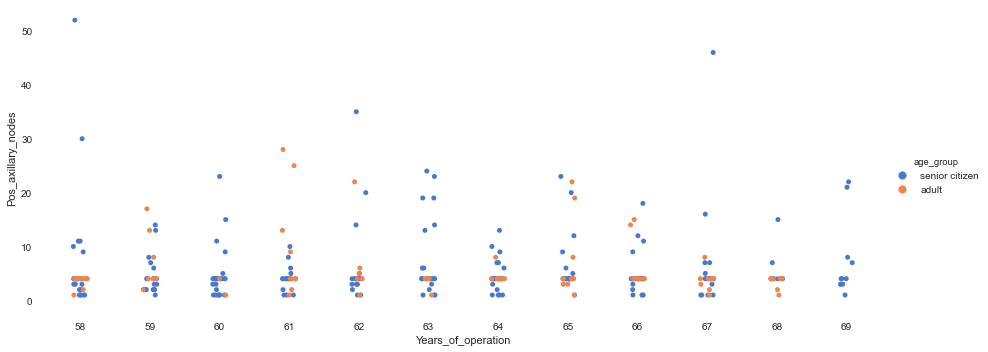

In [149]:
sns.catplot(x="Years_of_operation", y="Pos_axillary_nodes", hue="age_group", palette="muted", data=data, height=5,aspect=2.5)

- A Scatter plot to analyze the nodes operated on over the years and it shows some outliers.
- Also shows that senior citizens were operated more and generally for more number of nodes than those in adults.

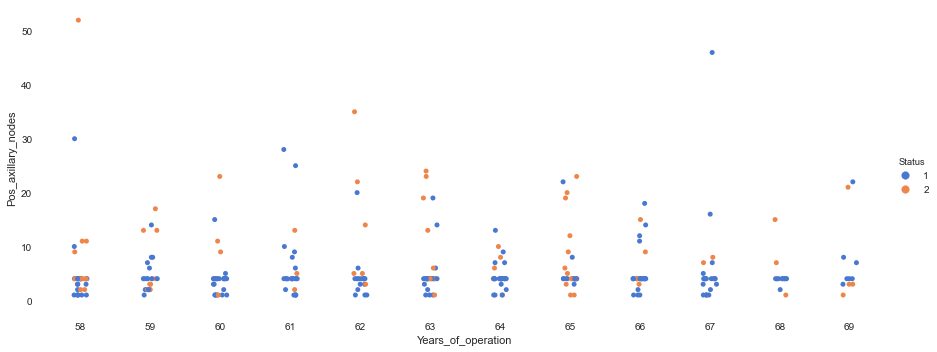

In [154]:
sns.catplot(x="Years_of_operation", y="Pos_axillary_nodes", hue="Status", palette="muted", data=data, height=5,aspect=2.5)

- This plot has been placed right below the similar one with the age group because we also waanted to identify the impact of survival category on the spread between year of operation and number of nodes.
- This indicates that the operations conducted throught generally have resulted in survival category 1, which is a positive outcome.

<a id=section6></a>
# 6. Conclusions:
### Actionable Insights

<img src="https://github.com/NiveditaAb/EDA_Pratice_BreastCancer/blob/master/doctor.jpg?raw=true" align='left' width=350 height=450 >
<img src="https://github.com/NiveditaAb/EDA_Pratice_BreastCancer/blob/master/survivor.jpg?raw=true" align='right' width=550 height=550 >

- The age has an impaact on survival category and the adults have more chance of survival post operation, but with less number of nodes.
- The senior citizens with high number of POS axillary nodes, shows struggle in survival beyond 5 years after having been operated.
- Its better to go for an earlier diagnosis, at lesser age and lesser nodes, and get operated for increasing the chance of survival.